In [1]:
#
# plot olr distribution using ZL6 dataset
#
import xarray as xr

# open Zarr with xarray
zd = xr.open_zarr("/large/sftpgo/data/NICAM/hackathon/healpix/NICAM_3d6h_z6.zarr")
zd

<xarray.Dataset> Size: 43GB
Dimensions:  (time: 1460, lev: 25, cell: 49152)
Coordinates:
  * lev      (lev) float64 200B 1e+03 975.0 950.0 925.0 ... 20.0 10.0 5.0 1.0
  * time     (time) datetime64[ns] 12kB 2020-03-01T06:00:00 ... 2021-03-01
Dimensions without coordinates: cell
Data variables:
    healpix  int32 4B ...
    hur      (time, lev, cell) float32 7GB dask.array<chunksize=(4, 5, 49152), meta=np.ndarray>
    hus      (time, lev, cell) float32 7GB dask.array<chunksize=(4, 5, 49152), meta=np.ndarray>
    ta       (time, lev, cell) float32 7GB dask.array<chunksize=(4, 5, 49152), meta=np.ndarray>
    ua       (time, lev, cell) float32 7GB dask.array<chunksize=(4, 5, 49152), meta=np.ndarray>
    va       (time, lev, cell) float32 7GB dask.array<chunksize=(4, 5, 49152), meta=np.ndarray>
    wa       (time, lev, cell) float32 7GB dask.array<chunksize=(4, 5, 49152), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    comment:      Be careful that definition of time coordinate depends on th...
    history:      Wed Mar 05 00:00:07 2025: cdo mergetime 03/ms_qv_p25.nc 04/...
    title:        NICAM data output

In [10]:
nt = zd.ua.shape[0]
#ua = zd.ua.isel(time=nt-1) # Outgoing Longwave Radiation
ua = zd.ua.isel(time=0) # Outgoing Longwave Radiation
ua.shape
#olr.shape: 12 * 4^6 = 49152

(25, 49152)

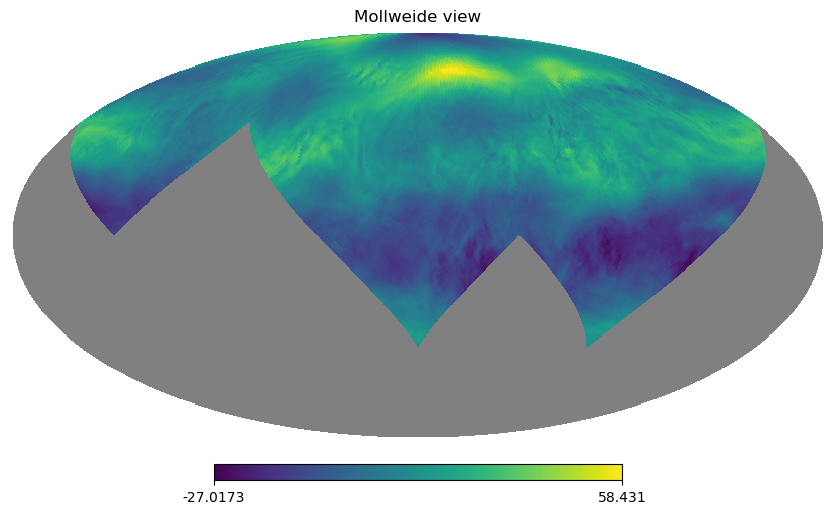

In [11]:
import healpy as hp
import matplotlib.pyplot as plt 

flg_nested = zd.healpix.healpix_order == "nested"
hp.mollview(ua[18,:], flip="geo", nest=flg_nested)


In [1]:
import easygems.healpix as egh